## Gerenciamente das salas de aulas do ensino médio e fundamental

   #### A divisão de várias matérias para estudar em um único dia acaba não sendo eficaz no aprendizado, além de todas as turmas recebrem tratamento iguaritário no quesito de matéria/educação, sendo que cada turma tem suas qualidade especificas que podem ser desenvolvidas. Além desse modelo de gerenciamento trazer vários impessilhos para o estudante que trabalha, ou te  algum compromisso além dos estudos no dia-a-dia.

   ### A idéia principal do projeto é trazer o máximo do potencial de cada turma, tendo um gerenciamento das matérias automátizado individualmente para cada turma e suas peculiaridades, além de um gerenciamente individula do aluno de notas, rendimento e faltas o sistema vai contar com uma area de dashboards do usuario master

#### Esse método é responsável por inicializar as váriaveis principais do programa, e importar as bibliotecas que serão ultilizadas no programa

In [1]:
import matplotlib.pyplot as plt

# inicializar variaveis
notas = []
materias = []
alunos = []

#### método genérico para sobrescrever um arquivo com valores pré-definidos em uma lista de dicionarios (*.csv). Onde o argumento 'arquivo' é uma String contendo o nome do arquivo, e o argumento valores é umas lista de dicionários contendo os valores para sobrescrever o conteudo do arquivo.

In [2]:

# atualizar arqivvo csv com novos valores
def atualizarCsv(arquivo, valores):
	if( len(valores) < 1 ):
		print("valores vázios")
		return False
	with open(arquivo, "w") as csv:
		conteudo = []
		string = ""
		# adicionar o cabeçalho do arquivo csv com as chaves do dicionario
		for i in range( len(valores[0].keys()) ):
			if(i == ( len( list( valores[0].keys() ) ) - 1 ) ):
				string += ( list( valores[0].keys() )[i]+"\n" )
			else:
				string += ( list( valores[0].keys() )[i]+";" )
		if(not string == ""):
			conteudo.append(string)

		# adicionar os valores do arquivo csv
		for i in range( len(valores) ):
			total = len( valores[i].items() ) - 1
			cont = 0
			string = ""
			for keys, valor in valores[i].items():
				string += valor+"\n" if cont == total else valor+";"
				cont += 1
			conteudo.append(string)
		print(conteudo)
		csv.writelines(conteudo)

#### método genérico para ler um arquivo (*.csv) com campos pré-definidos em uma lista. Onde o argumento 'arquivo' é uma String com o nome do arquivo e o argumento 'campos' é uma lista com os campos do csv

In [3]:

# ler or arquivos csv
def lerCsv( arquivo, campos ):
	array = []
	first = True
	with open(arquivo, "r") as csv:
		linhas = csv.readlines()
		for linha in linhas:
			arr = linha.split(";")
			if( len(arr) > 1 ):
				dicionario = {}
				# pula o cabeçalho (primeira linha) do csv
				if( first ):
					first = False
				else:
					for i in range( len( campos ) ):
						# percorre tanto a lista dos campos e os valores do csv para adicionar campos ao dicionario, e retira a quebra de linha dor csv (\n)
						if( i == (len(campos)-1) ):
							dicionario[campos[i]] = arr[i].replace("\n","")
						else:
							dicionario[campos[i]] = arr[i]
					array.append( dicionario )
	return array

#### método para inicializar todas as váriaveis que serão usadas no sistema

In [4]:
def inicializar():
	global alunos, materias, notas
	alunos = lerCsv("alunos.csv", [ "id","nome" ])
	materias = lerCsv("materias.csv", [ "id","nome","peso" ])
	notas = lerCsv("notas.csv", [ "id" , "valor" , "aluno", "materia" ])

#### método genérico para calcular a média de notas de uma matéria especifica

In [5]:

# Calcula a media e uma matéria esécifíca
def mediaNotas( materia ):
	soma = 0
	contador = 0
	for nota in notas:
		# verifica todas as notas especifícas da matéria passada pelo parametro
		if( nota["materia"] == materia["id"] ):
			soma += round( float( nota["valor"] ), 2 )
			contador += 1
	# cada prova vale 10, por isso multiplicar or 10 dara a porcentagem
	return ( soma / contador ) * 10


#### método genérico para calcular a média de notas de uma matéria especifica, com um aluno especifica

In [6]:
# Calcula a media e uma matéria esécifíca
def mediaAluno( materia, aluno ):
	soma = 0
	contador = 0
	for nota in notas:
		# verifica todas as notas especifícas da matéria passada pelo parametro
		if( nota["materia"] == materia["id"] and nota["aluno"] == aluno["id"] ):
			soma += round( float( nota["valor"] ), 2 )
			contador += 1
	# cada prova vale 10, por isso multiplicar or 10 dara a porcentagem
	return ( soma / contador ) * 10

#### método para calcular qual é a necessidade de cada matéria em base no desenvolvimento da turma em geral da turma

In [7]:
def grade():
	global materias
	# pegar todas as médias das matérias
	medias = []
	for materia in materias:
		medias.append( mediaNotas( materia ) )
	# calcular a necessidade de cada materia
	necessidades = []
	for media in medias:
		necessidades.append( 100 - media )
	# igualar cada o valor de necessidade com regra de 3
	soma = sum(necessidades)
	nomeMaterias = []
	porcentagens = []
	for i in range( len(materias) ):
		porcentagem = ( 100 * necessidades[i] ) / soma
		porcentagem = round(porcentagem, 2)
		porcentagens.append( porcentagem )
		nomeMaterias.append( materias[i]["nome"] )
		# print("A turma terá {0}% de aulas da matéria {1}".format(porcentagem, materias[i]["nome"]))
	return [ nomeMaterias, porcentagens ]
		


#### método responsável por pegar a média de todas as matérias de um aluno especifíco 

In [8]:
def gradeAlunos( aluno ):
	global materias
	medias = []
	for materia in materias:
		medias.append( mediaAluno( materia, aluno ) )
	nomeMaterias = []
	porcentagens = []
	for i in range( len(materias) ):
		porcentagens.append( medias[i] )
		nomeMaterias.append( materias[i]["nome"][0:3] )
	# retorna uma lista pois será usava pra visualização do gráfico
	return [ nomeMaterias, porcentagens ]

#### método responsável por visualização do gráfico em pizza das necessidade de cada matéria

In [9]:
def mostrarGrade():
	resultado = grade()
	
	labels = resultado[0]
	sizes = resultado[1]
	
	fig, ax = plt.subplots()
	ax.pie(sizes, labels=labels, autopct='%1.2f%%')
	ax.axis('equal')
	ax.set_title('Matérias da Escola')
	
	plt.show()

#### método responsável por procurar um aluno com base no nome, onde o argumento 'nome' é uma string com o nome do aluno

In [10]:
def procurarAluno(nome):
	# mostrar alunos
	for aluno in alunos:
		if( aluno["nome"] == nome):
			return aluno
	return -1

#### método responsável por selecionar um aluno, e mostrar a sua média nas matérias

In [11]:
def rendimentoAluno():
	# mostrar alunos
	for aluno in alunos:
		print(aluno["nome"])
	nome = input("escreva o nome do aluno para visualizar seu rendimento: ")
	aluno = procurarAluno(nome)
	if( not aluno == -1 ):        
		resultado = gradeAlunos( aluno )
		
		labels = resultado[0]
		sizes = resultado[1]
		
		fig, ax = plt.subplots()
		plt.bar(labels, sizes, width=0.5)
		plt.figure(figsize=(20, 3))
		ax.set_ylabel('Nota')
		ax.set_xlabel('Matéria')
		ax.set_title('Rendimento do aluno')
		plt.show()
		
	else:
		print("aluno inválido")    

#### método responsável por selecionar qual operação o usuário irá realizar com o programa

In [12]:
def opcoes():
	op = 0
	while(not op == 3):
		op = int( input('''
1 - ver a divisão de matérias da turma
2 - ver o rendimento de um aluno específico
3 - sair
        
Selecione uma das opções: ''') )
		if(op == 1):
			mostrarGrade()
		elif(op == 2):
			rendimentoAluno()
		elif(op == 3):
			print("Obrigado por usar o gerenciamento Estudantil")
		else:
			print("Opção inválida")
    

#### código principal do programa que irá chamar os métodos principais


1 - ver a divisão de matérias da turma
2 - ver o rendimento de um aluno específico
3 - sair
        
Selecione uma das opções: 1


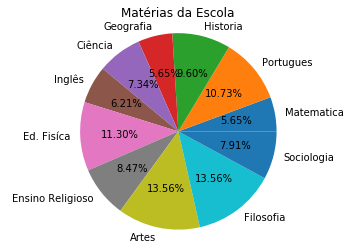


1 - ver a divisão de matérias da turma
2 - ver o rendimento de um aluno específico
3 - sair
        
Selecione uma das opções: 2
Lucas
Pedro
Fernanda
Diogo
escreva o nome do aluno para visualizar seu rendimento: Lucas


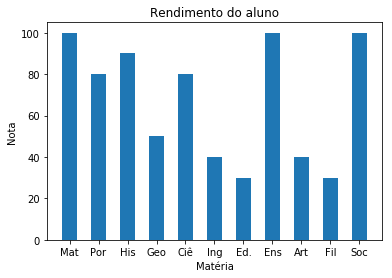

<Figure size 1440x216 with 0 Axes>


1 - ver a divisão de matérias da turma
2 - ver o rendimento de um aluno específico
3 - sair
        
Selecione uma das opções: 2
Lucas
Pedro
Fernanda
Diogo
escreva o nome do aluno para visualizar seu rendimento: lucas
aluno inválido

1 - ver a divisão de matérias da turma
2 - ver o rendimento de um aluno específico
3 - sair
        
Selecione uma das opções: 2
Lucas
Pedro
Fernanda
Diogo
escreva o nome do aluno para visualizar seu rendimento: Diogo


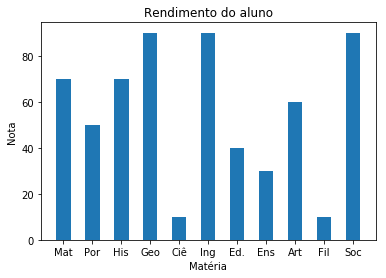

<Figure size 1440x216 with 0 Axes>


1 - ver a divisão de matérias da turma
2 - ver o rendimento de um aluno específico
3 - sair
        
Selecione uma das opções: 3
Obrigado por usar o gerenciamento Estudantil


In [13]:
inicializar()
opcoes()